In [3]:
import sqlite3
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')



In [4]:
url = 'https://github.com/mdsabuj-eng/employee-performance-visualization-with-python/raw/refs/heads/main/employee_analysis.db'
db_path = 'employee_analysis.db'

urllib.request.urlretrieve(url, db_path)
print("Database downloaded successfully!")


Database downloaded successfully!


In [5]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Connected to the SQLite database!")


Connected to the SQLite database!


In [6]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables available in the database:", tables)


Tables available in the database: [('Department',), ('Employee',), ('PerformanceReview',)]


In [7]:
query = "SELECT * FROM Employee LIMIT 5;"
df_sample = pd.read_sql_query(query, conn)
df_sample


,EmployeeID,Name,DepartmentID,Salary,JoiningDate
0,1,John Doe,1,50000,2018-04-23
1,2,Jane Smith,2,60000,2019-06-12
2,3,Mike Johnson,3,70000,2017-03-15
3,4,Emily Davis,4,55000,2020-08-19
4,5,James Wilson,1,52000,2018-11-30


In [8]:
query = "SELECT * FROM Department LIMIT 5;"
df_sample = pd.read_sql_query(query, conn)
df_sample

,DepartmentID,DepartmentName,Manager
0,1,Sales,Alice Brown
1,2,HR,Bob Smith
2,3,IT,Carol Johnson
3,4,Marketing,David Lee
4,5,Finance,Eva Green


In [9]:
query = "SELECT * FROM PerformanceReview LIMIT 5;"
df_sample = pd.read_sql_query(query, conn)
df_sample

,ReviewID,EmployeeID,ReviewDate,Score,Comments
0,1,1,2023-01-15,4.5,Excellent communication skills
1,2,2,2023-01-18,4.7,Great team player
2,3,3,2023-01-20,4.8,Outstanding technical knowledge
3,4,4,2023-01-25,4.3,Needs to improve punctuality
4,5,5,2023-01-30,4.6,Strong sales performance


In [10]:


df_full = pd.read_sql_query("SELECT * FROM Employee;", conn)
df_full.info()
df_full.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EmployeeID    14 non-null     int64 
 1   Name          14 non-null     object
 2   DepartmentID  14 non-null     int64 
 3   Salary        14 non-null     int64 
 4   JoiningDate   14 non-null     object
dtypes: int64(3), object(2)
memory usage: 692.0+ bytes


,EmployeeID,DepartmentID,Salary
count,14.0000,14.000000,14.000000
mean,7.5000,2.857143,60571.428571
std,4.1833,1.406422,7490.653517
min,1.0000,1.000000,50000.000000
25%,4.2500,2.000000,54250.000000
50%,7.5000,3.000000,60500.000000
75%,10.7500,4.000000,66500.000000
max,14.0000,5.000000,72000.000000


In [11]:


df_full = pd.read_sql_query("SELECT * FROM Department;", conn)
df_full.info()
df_full.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DepartmentID    5 non-null      int64 
 1   DepartmentName  5 non-null      object
 2   Manager         5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


,DepartmentID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [12]:


df_full = pd.read_sql_query("SELECT * FROM PerformanceReview;", conn)
df_full.info()
df_full.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ReviewID    14 non-null     int64  
 1   EmployeeID  14 non-null     int64  
 2   ReviewDate  14 non-null     object 
 3   Score       14 non-null     float64
 4   Comments    14 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 692.0+ bytes


,ReviewID,EmployeeID,Score
count,14.0000,14.0000,14.000000
mean,7.5000,7.5000,4.571429
std,4.1833,4.1833,0.212779
min,1.0000,1.0000,4.200000
25%,4.2500,4.2500,4.425000
50%,7.5000,7.5000,4.600000
75%,10.7500,10.7500,4.700000
max,14.0000,14.0000,4.900000


In [13]:
!pip install ipython-sql


In [14]:
%load_ext sql

In [15]:
%sql sqlite:///employee_analysis.db


In [16]:
for row in cursor.execute('SELECT * FROM PerformanceReview LIMIT 5'):
    print(row)

(1, 1, '2023-01-15', 4.5, 'Excellent communication skills')
(2, 2, '2023-01-18', 4.7, 'Great team player')
(3, 3, '2023-01-20', 4.8, 'Outstanding technical knowledge')
(4, 4, '2023-01-25', 4.3, 'Needs to improve punctuality')
(5, 5, '2023-01-30', 4.6, 'Strong sales performance')


In [18]:
for row in cursor.execute('select * from Department limit 5'):
    print(row)

(1, 'Sales', 'Alice Brown')
(2, 'HR', 'Bob Smith')
(3, 'IT', 'Carol Johnson')
(4, 'Marketing', 'David Lee')
(5, 'Finance', 'Eva Green')


In [19]:
for row in cursor.execute('select * from Employee limit 5'):
    print(row)

(1, 'John Doe', 1, 50000, '2018-04-23')
(2, 'Jane Smith', 2, 60000, '2019-06-12')
(3, 'Mike Johnson', 3, 70000, '2017-03-15')
(4, 'Emily Davis', 4, 55000, '2020-08-19')
(5, 'James Wilson', 1, 52000, '2018-11-30')


In [24]:
#Task 1:
#Show total number of employees per department (use SQL or Pandas).

#Display the result as a Pandas DataFrame.



query = '''
SELECT DepartmentID, COUNT(EmployeeID) AS EmployeeCount
FROM Employee
GROUP BY DepartmentID
'''

df = pd.read_sql_query(query, conn)
print(df)


   DepartmentID  EmployeeCount
0             1              3
1             2              3
2             3              3
3             4              3
4             5              2


In [25]:



#Task 2:
#Calculate total salary expense per department.

#Calculate average performance score per department (join Employee and PerformanceReview).

#Show the results as a combined Pandas DataFrame with columns:
#DepartmentID | TotalSalary | AvgPerformanceScore

In [29]:
query=''' select
DepartmentID,
sum(Salary),
avg(Score)
from Employee e 
join PerformanceReview p on e.EmployeeID =p.EmployeeID	
group by 1;'''

df=pd.read_sql_query(query,conn)
print(df)

   DepartmentID  sum(Salary)  avg(Score)
0             1       155000    4.566667
1             2       183000    4.600000
2             3       213000    4.833333
3             4       165000    4.266667
4             5       132000    4.600000


In [28]:
%%sql 
select * from PerformanceReview limit 2;

 * sqlite:///employee_analysis.db
Done.


ReviewID,EmployeeID,ReviewDate,Score,Comments
1,1,2023-01-15,4.5,Excellent communication skills
2,2,2023-01-18,4.7,Great team player


In [30]:
#Task 3 
#Bar Chart — Total Salary Expense per Department

In [33]:
query=''' select DepartmentID,sum(Salary) Total_salary  from Employee group by 1;'''
df_salary=pd.read_sql_query(query,conn)
print(df_salary)

   DepartmentID  Total_salary
0             1        155000
1             2        183000
2             3        213000
3             4        165000
4             5        132000


C:\Users\HP\AppData\Local\Temp\ipykernel_18572\2298939021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


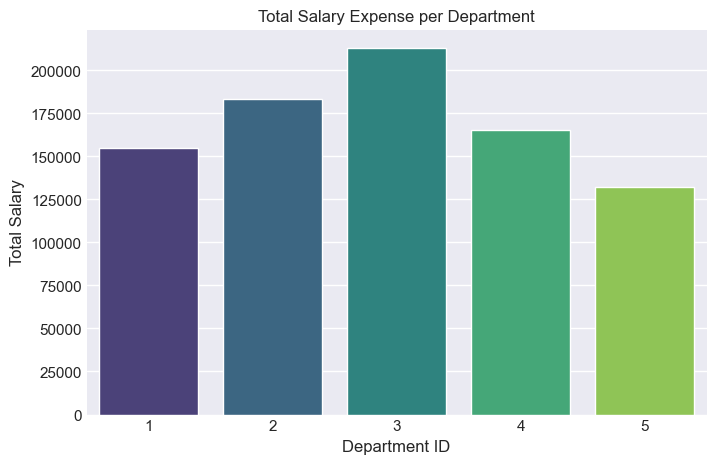

In [34]:

plt.figure(figsize=(8,5))  
sns.barplot(                
    data=df_salary,        
    x='DepartmentID',    
    y='Total_salary',       
    palette='viridis'       
)
plt.title('Total Salary Expense per Department')  
plt.xlabel('Department ID')                      
plt.ylabel('Total Salary')                        
plt.show()              


In [35]:
##Task 4: Pie Chart — Employee Distribution by Department


In [39]:
query=''' select DepartmentID,count(EmployeeID) as employeecount from Employee group by 1;'''
df=pd.read_sql_query(query,conn)
print(df)

   DepartmentID  employeecount
0             1              3
1             2              3
2             3              3
3             4              3
4             5              2


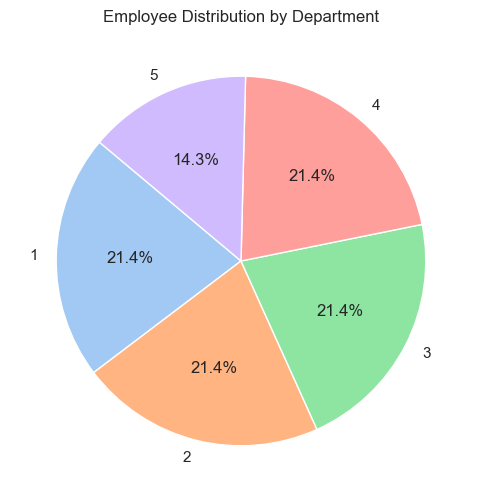

In [40]:
plt.figure(figsize=(6,6))
plt.pie(df['employeecount'], 
        labels=df['DepartmentID'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title('Employee Distribution by Department')
plt.show()


In [41]:
###Task 5: Line Chart — Average Performance Score Trend by Review Date

In [42]:
query = '''
SELECT ReviewDate, AVG(Score) AS AvgScore
FROM PerformanceReview
GROUP BY ReviewDate
ORDER BY ReviewDate
'''

df = pd.read_sql_query(query, conn)
print(df)


    ReviewDate  AvgScore
0   2023-01-15       4.5
1   2023-01-18       4.7
2   2023-01-20       4.8
3   2023-01-25       4.3
4   2023-01-30       4.6
5   2023-02-05       4.9
6   2023-02-10       4.4
7   2023-02-12       4.2
8   2023-02-15       4.5
9   2023-02-18       4.7
10  2023-02-20       4.6
11  2023-02-22       4.8
12  2023-02-25       4.3
13  2023-02-28       4.7


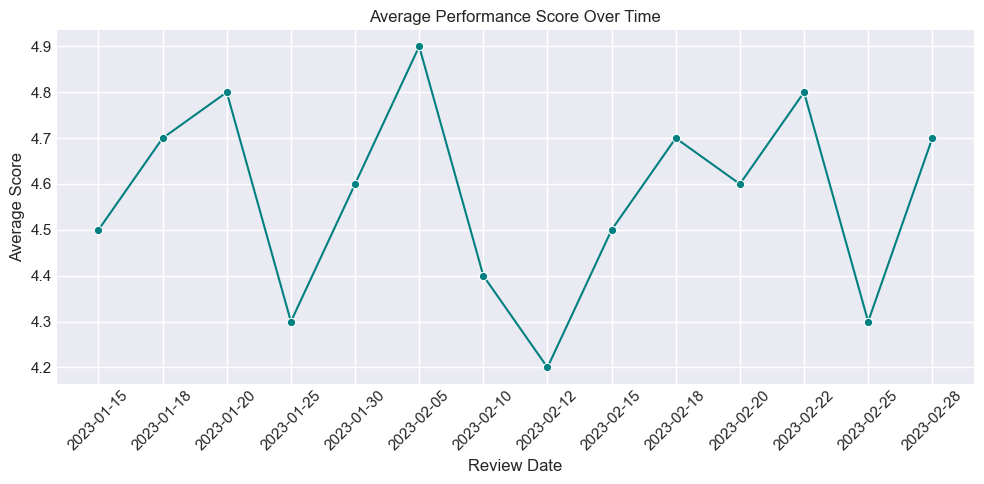

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='ReviewDate', y='AvgScore', marker='o', color='teal')

plt.title('Average Performance Score Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [44]:
##Task 6: Heatmap — Department vs Average Salary

In [45]:
query = '''
SELECT DepartmentID, AVG(Salary) AS AvgSalary
FROM Employee
GROUP BY DepartmentID
'''

df= pd.read_sql_query(query, conn)
print(df)


   DepartmentID     AvgSalary
0             1  51666.666667
1             2  61000.000000
2             3  71000.000000
3             4  55000.000000
4             5  66000.000000


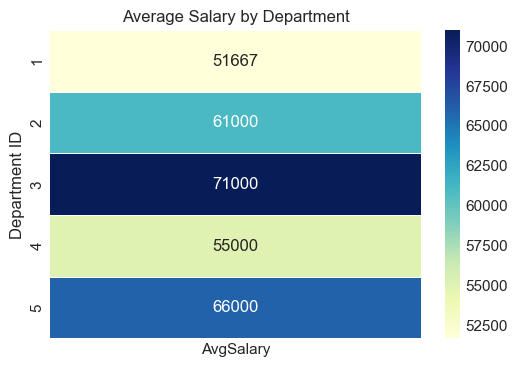

In [46]:
plt.figure(figsize=(6,4))
heatmap_data = df.pivot_table(index='DepartmentID', values='AvgSalary')

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)

plt.title('Average Salary by Department')
plt.ylabel('Department ID')
plt.xlabel('')  # No xlabel since only index is shown
plt.show()


In [47]:
##Task 7: Box Plot — Salary Distribution by Department

In [48]:
query = '''
SELECT DepartmentID, Salary
FROM Employee
'''

df = pd.read_sql_query(query, conn)
print(df)


    DepartmentID  Salary
0              1   50000
1              2   60000
2              3   70000
3              4   55000
4              1   52000
5              3   72000
6              2   61000
7              4   54000
8              5   65000
9              5   67000
10             1   53000
11             3   71000
12             4   56000
13             2   62000


C:\Users\HP\AppData\Local\Temp\ipykernel_18572\2015928950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DepartmentID', y='Salary', palette='Set2')


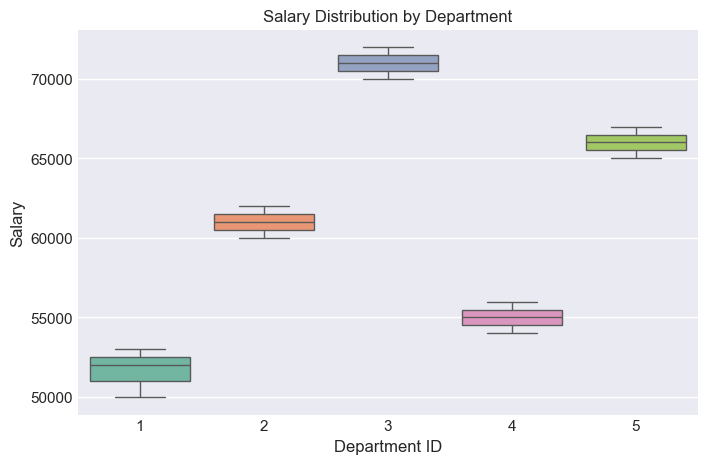

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='DepartmentID', y='Salary', palette='Set2')

plt.title('Salary Distribution by Department')
plt.xlabel('Department ID')
plt.ylabel('Salary')
plt.show()


In [51]:
query = '''
SELECT e.Salary, p.Score
FROM Employee e
JOIN PerformanceReview p ON e.EmployeeID = p.EmployeeID
'''

df = pd.read_sql_query(query, conn)
print(df)


    Salary  Score
0    50000    4.5
1    60000    4.7
2    70000    4.8
3    55000    4.3
4    52000    4.6
5    72000    4.9
6    61000    4.4
7    54000    4.2
8    65000    4.5
9    67000    4.7
10   53000    4.6
11   71000    4.8
12   56000    4.3
13   62000    4.7


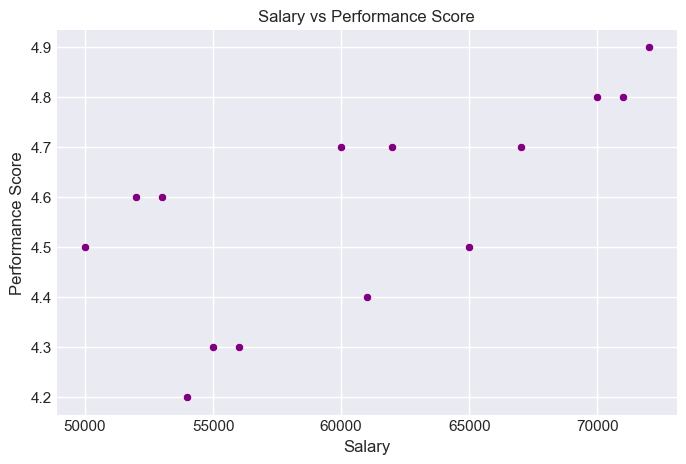

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Salary', y='Score', color='purple')

plt.title('Salary vs Performance Score')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()


In [53]:
 ###Task 9: KPI Card Values — (Text Display / Summary Metrics)

In [56]:
query = '''
SELECT 
    COUNT(EmployeeID) AS TotalEmployees,
    AVG(Salary) AS AvgSalary
FROM Employee
'''

df_kpi1 = pd.read_sql_query(query, conn)

query = '''
SELECT 
    AVG(Score) AS AvgPerformanceScore
FROM PerformanceReview
'''

df_kpi2 = pd.read_sql_query(query, conn)

print(df_kpi1)
print(df_kpi2)


   TotalEmployees     AvgSalary
0              14  60571.428571
   AvgPerformanceScore
0             4.571429


In [57]:
total_employees = df_kpi1.loc[0, 'TotalEmployees']
avg_salary = df_kpi1.loc[0, 'AvgSalary']
avg_score = df_kpi2.loc[0, 'AvgPerformanceScore']

print(f"Total Employees: {total_employees}")
print(f"Average Salary: {avg_salary:.2f}")
print(f"Average Performance Score: {avg_score:.2f}")


Total Employees: 14
Average Salary: 60571.43
Average Performance Score: 4.57


In [58]:
##10.Task: Create a Heatmap to Show Correlation Between Numeric Variables in PerformanceReview Table.

In [59]:
query = "SELECT * FROM PerformanceReview;"
df_review = pd.read_sql_query(query, conn)
print(df_review)

    ReviewID  EmployeeID  ReviewDate  Score                         Comments
0          1           1  2023-01-15    4.5   Excellent communication skills
1          2           2  2023-01-18    4.7                Great team player
2          3           3  2023-01-20    4.8  Outstanding technical knowledge
3          4           4  2023-01-25    4.3     Needs to improve punctuality
4          5           5  2023-01-30    4.6         Strong sales performance
5          6           6  2023-02-05    4.9             Leadership potential
6          7           7  2023-02-10    4.4          Reliable and consistent
7          8           8  2023-02-12    4.2          Good marketing insights
8          9           9  2023-02-15    4.5     Excellent financial analysis
9         10          10  2023-02-18    4.7                  Detail oriented
10        11          11  2023-02-20    4.6          Creative problem solver
11        12          12  2023-02-22    4.8                    Quick learner

In [63]:
query='''select ReviewID,EmployeeID,Score from PerformanceReview'''
df=pd.read_sql_query(query,conn)
print(df)

    ReviewID  EmployeeID  Score
0          1           1    4.5
1          2           2    4.7
2          3           3    4.8
3          4           4    4.3
4          5           5    4.6
5          6           6    4.9
6          7           7    4.4
7          8           8    4.2
8          9           9    4.5
9         10          10    4.7
10        11          11    4.6
11        12          12    4.8
12        13          13    4.3
13        14          14    4.7


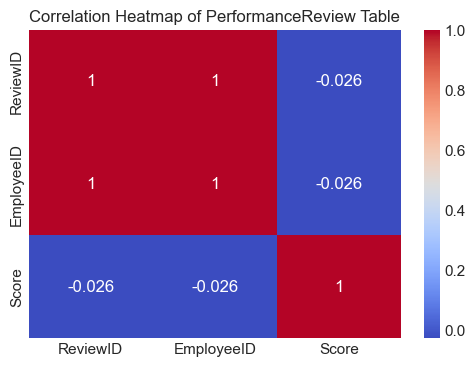

In [64]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of PerformanceReview Table')
plt.show()